In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IBM_2006-01-01_to_2018-01-01.csv')
print(df.head())


         Date   Open   High    Low  Close    Volume Name
0  03-01-2006  82.45  82.55  80.81  82.06  11715200  IBM
1  04-01-2006  82.20  82.50  81.33  81.95   9840600  IBM
2  05-01-2006  81.40  82.90  81.00  82.50   7213500  IBM
3  06-01-2006  83.95  85.03  83.41  84.95   8197400  IBM
4  09-01-2006  84.10  84.25  83.38  83.73   6858200  IBM


In [ ]:

data = df[['Close']].values


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]


In [ ]:
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0747 - val_loss: 8.6984e-04
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 8.2897e-04
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.5302e-04 - val_loss: 7.9035e-04
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.2461e-04 - val_loss: 8.0854e-04
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.6425e-04 - val_loss: 6.9346e-04
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.8914e-04 - val_loss: 6.4404e-04
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.3526e-04 - val_loss: 7.2307e-04
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.3672e-04 - val_loss: 5.8888e-04
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7965e-04 - val_loss: 5.4351e-04
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9562e-04 - val_loss: 5.0939e-04
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7249e-04 -

In [ ]:

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


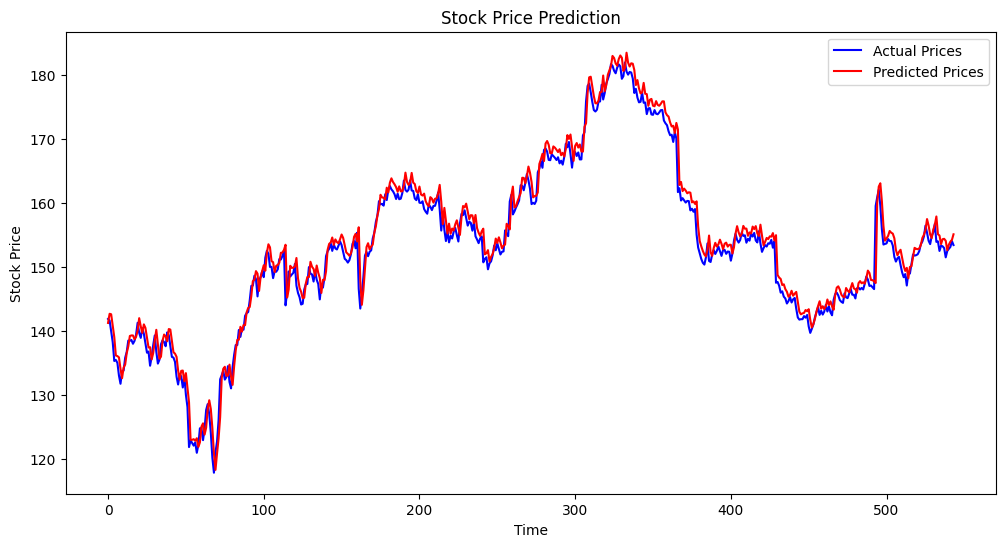

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
df_comparison = pd.DataFrame({'Actual Prices': actual_prices.flatten(), 'Predicted Prices': predicted_prices.flatten()})

In [ ]:
from IPython.display import display
display(df_comparison)

,Actual Prices,Predicted Prices
0,141.88,141.249756
1,141.63,142.684448
2,139.89,142.606445
3,138.25,140.843460
4,135.31,139.047134
...,...,...
539,152.50,152.618256
540,152.83,153.477005
541,153.13,153.950302
542,154.04,154.238297
